This study aims to analyze a hospital dataset to identify factors potentially associated with in-hospital mortality. We will investigate patient demographics (age group, gender) and the prevalence of specific medical conditions (atrial fibrillation, depression, hypertension, renal failure, hyperlipemia, and anaemia) to understand their potential relationships with mortality rates. By analyzing these factors, we hope to gain insights that can inform strategies for improving patient care and potentially reducing in-hospital mortality rates.

# Hospital Mortality Analysis

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('Hospital Mortality Analysis.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        1177 non-null   int64  
 1   outcome                   1176 non-null   float64
 2   age                       1177 non-null   int64  
 3   gender                    1177 non-null   int64  
 4   BMI                       962 non-null    float64
 5   hypertensive              1177 non-null   int64  
 6   atrialfibrillation        1177 non-null   int64  
 7   CHD with no MI            1177 non-null   int64  
 8   diabetes                  1177 non-null   int64  
 9   deficiencyanemias         1177 non-null   int64  
 10  depression                1177 non-null   int64  
 11  Hyperlipemia              1177 non-null   int64  
 12  Renal failure             1177 non-null   int64  
 13  COPD                      1177 non-null   int64  
 14  heart ra

In [4]:
missing_percentage = df.isna().sum() / len(df) * 100
print("Percentage of missing values in each column:")
print(missing_percentage)


Percentage of missing values in each column:
ID                           0.000000
outcome                      0.084962
age                          0.000000
gender                       0.000000
BMI                         18.266780
hypertensive                 0.000000
atrialfibrillation           0.000000
CHD with no MI               0.000000
diabetes                     0.000000
deficiencyanemias            0.000000
depression                   0.000000
Hyperlipemia                 0.000000
Renal failure                0.000000
COPD                         0.000000
heart rate                   1.104503
Systolic blood pressure      1.359388
Diastolic blood pressure     1.359388
Respiratory rate             1.104503
temperature                  1.614274
SPO2                         1.104503
dtype: float64


BMI has most amount of misssing value about 18% 

In [5]:
# no duplicates 
df.duplicated().sum()

0

# Sample dataset

In [6]:
df.sample(2)

,ID,outcome,age,gender,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,Renal failure,COPD,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SPO2
626,193576,1.0,83,2,33.388778,1,0,0,1,1,0,1,0,0,103.583333,105.160000,51.92,19.458333,35.777778,96.041667
1121,173491,0.0,85,2,29.859223,1,0,0,0,0,0,0,0,0,100.800000,102.055556,64.00,18.650000,35.888889,97.600000


In [7]:
numeric = ['age'  ,'BMI' ,'heart rate' , 'Systolic blood pressure'  ,'Diastolic blood pressure' ,  'Respiratory rate' ,'temperature' ,'SPO2']
category =['outcome' ,'gender' ,'hypertensive' ,'atrialfibrillation' ,'CHD with no MI'  ,'diabetes',	'deficiencyanemias',	'depression',	'Hyperlipemia'	,'Renal failure',	'COPD' ]

# univariate analysis

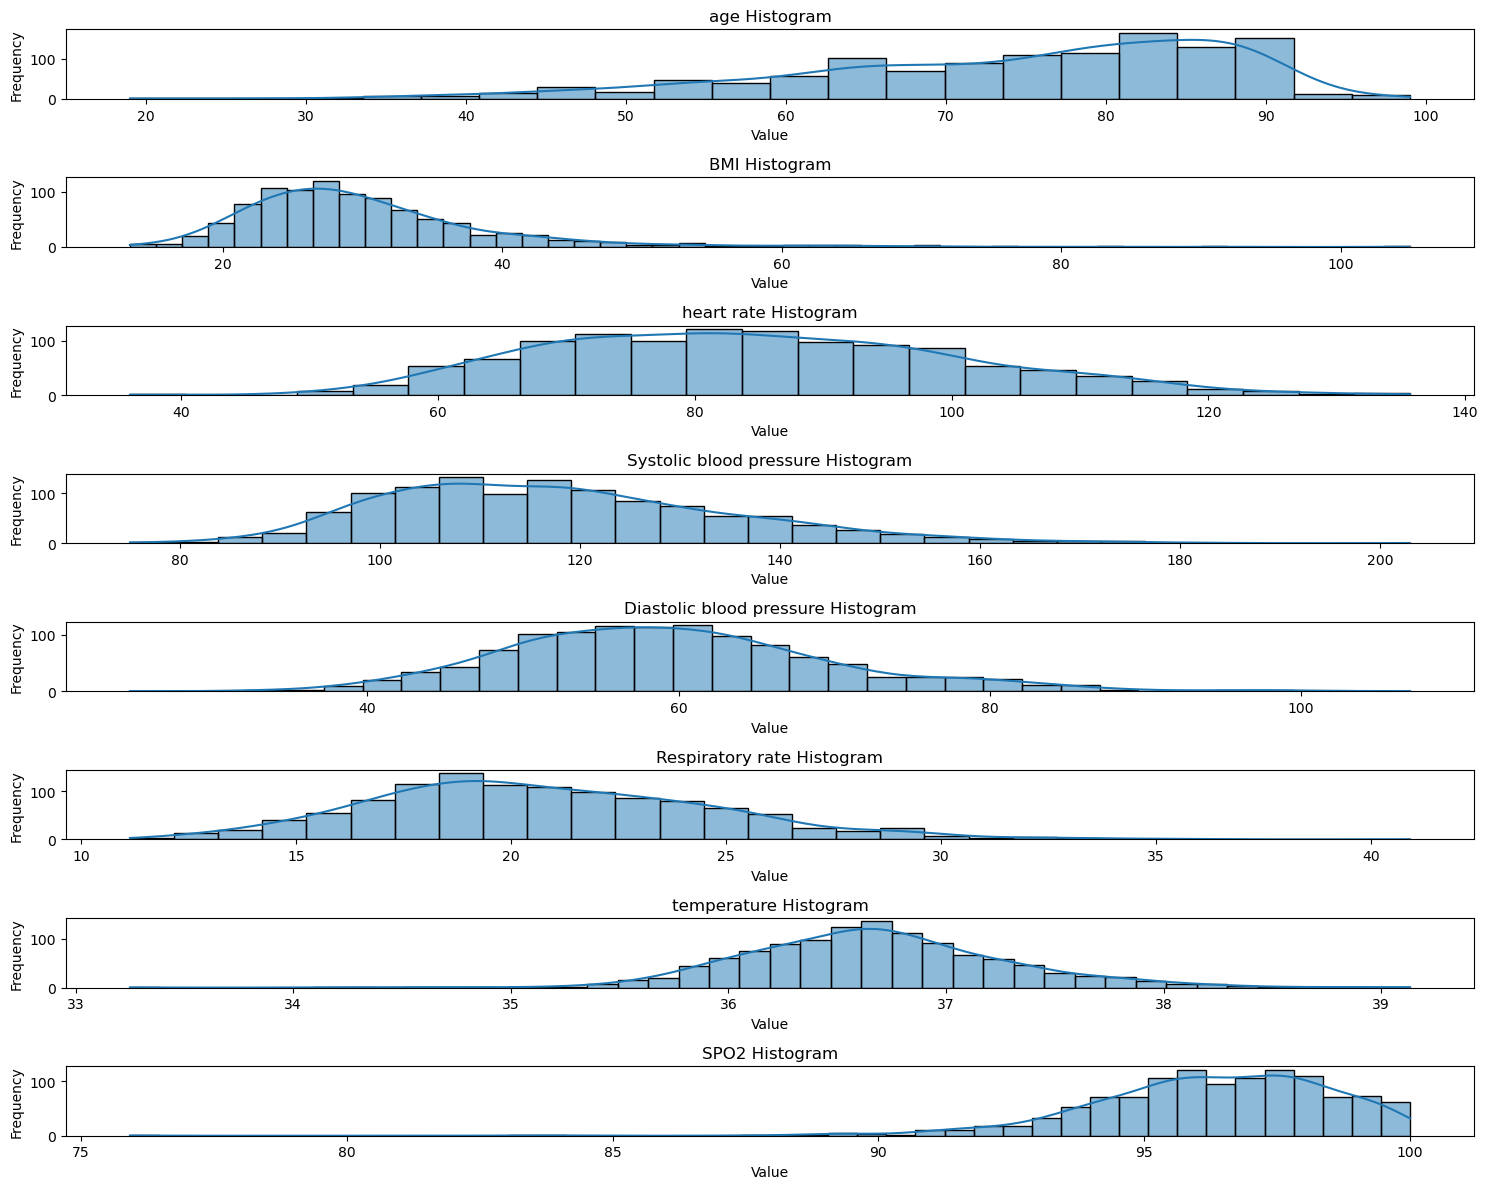

In [8]:


# Create a figure and axis object
fig, axs = plt.subplots(numeric.__len__(), figsize=(15, 12))

# Loop through each column in numeric
for i, col in enumerate(numeric):
    # # Plot the histogram for this column
    # axs[i].hist(df[col])
    sns.histplot(df[col]  , ax= axs[i],kde =True)
    
    # Set title and labels for the subplot
    axs[i].set_title(col + ' Histogram')
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


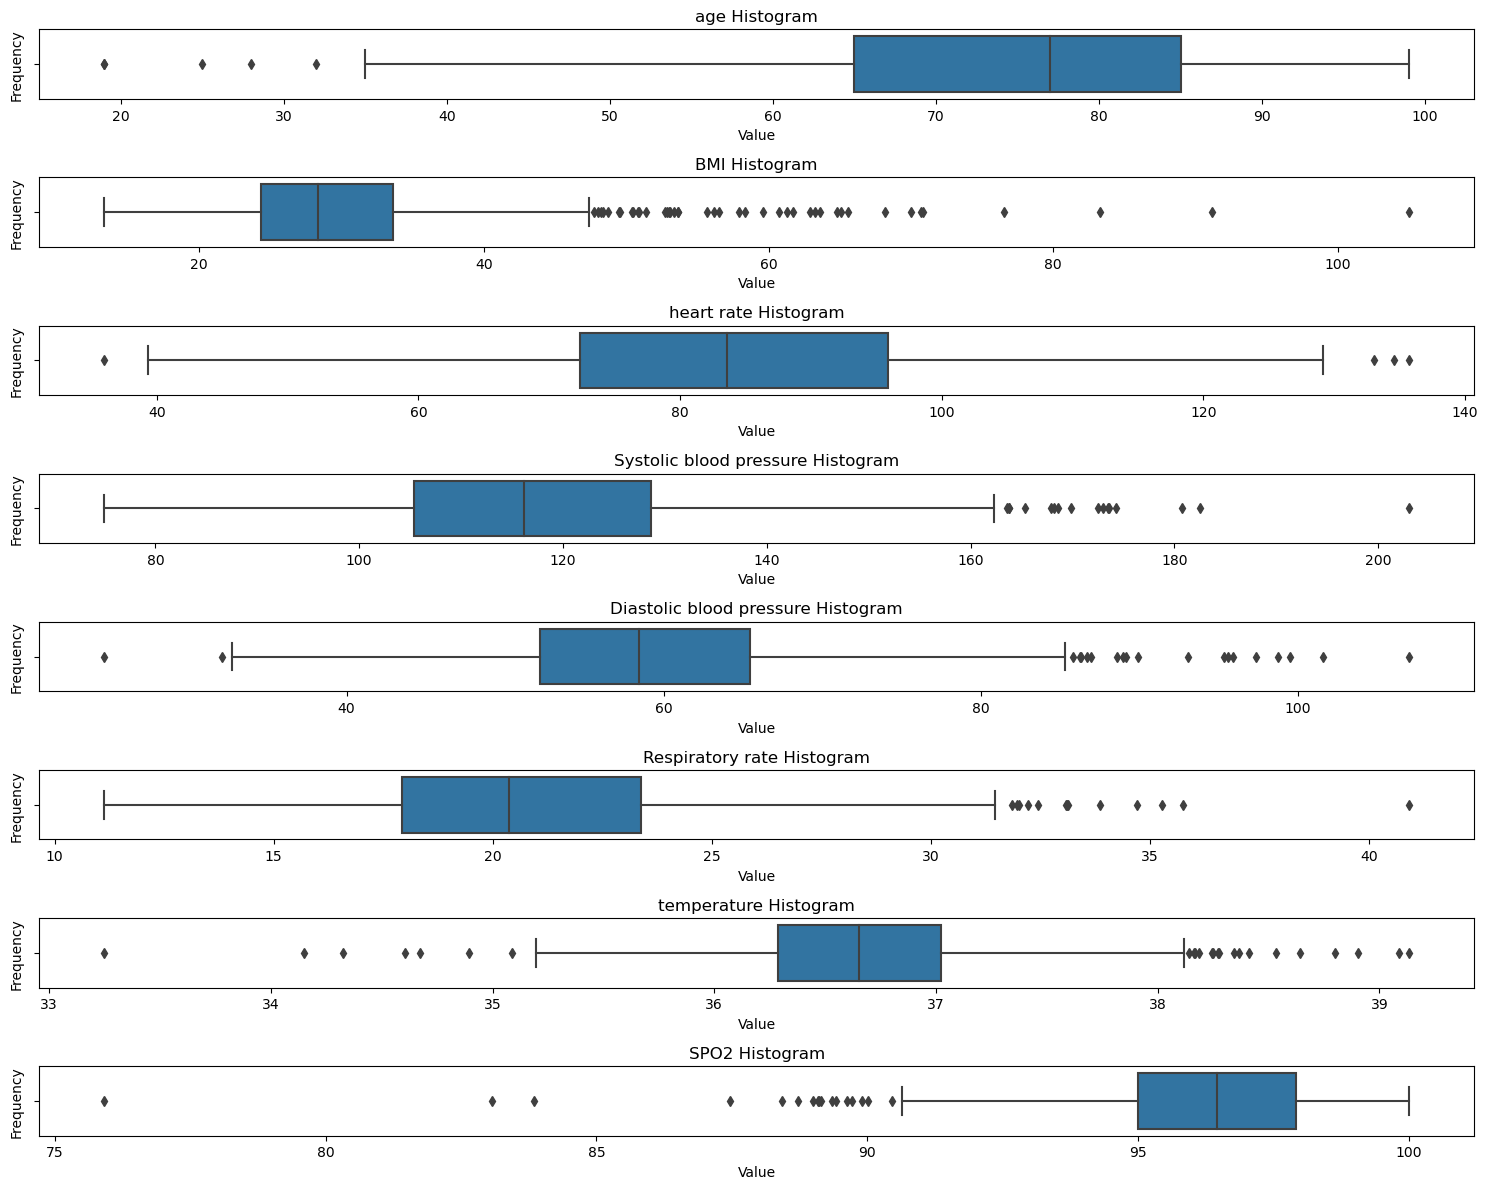

In [9]:


# Create a figure and axis object
fig, axs = plt.subplots(numeric.__len__(), figsize=(15, 12))

# Loop through each column in numeric
for i, col in enumerate(numeric):
    # # Plot the histogram for this column
    # axs[i].hist(df[col])
    sns.boxplot(x =df[col]  , ax= axs[i])
    
    # Set title and labels for the subplot
    axs[i].set_title(col + ' Histogram')
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


**Patient Demographics**
======================================================

The patient population under analysis comprises individuals from age **19** to **99**, with a mean age of **74**. Notably, **50%** of patients are below **77** years old.

**Body Mass Index (BMI)**
-------------------------

The BMI range for the patient population spans **13-104**, with a mean BMI of **30**. Moreover, **50%** of patients have a BMI less than **28**, indicating a significant proportion of underweight individuals.

**Cardiovascular Metrics**
==========================

### Heart Rate

* The heart rate range for the patient population is **36-135**, with both mean and median values closely aligned around **84**.

### Systolic Blood Pressure (SBP)

* The SBP range lies between **75-203**, with mean and median values similarly situated around **117**. A normal SBP value is typically considered to be below **120 mmHg**.

### Diastolic Blood Pressure (DBP)

* The DBP range spans **24-107**, with both mean and median values closely aligned around **59**. A normal DBP value is generally considered to be below **80 mmHg**.

**Respiratory Rate**
-------------------

The respiratory rate range for the patient population is **11-40**, with both mean and median values similarly situated around **20**.

**Temperature**
-------------

* The temperature range lies between **33°F to 39°F**, with both mean and median values closely aligned around **36°F**. A normal temperature range is typically considered to be between **36°F to 37°F**.

**Spo2**
Spo2  range from 75 -100   medain arounf 97 below 90 is bad

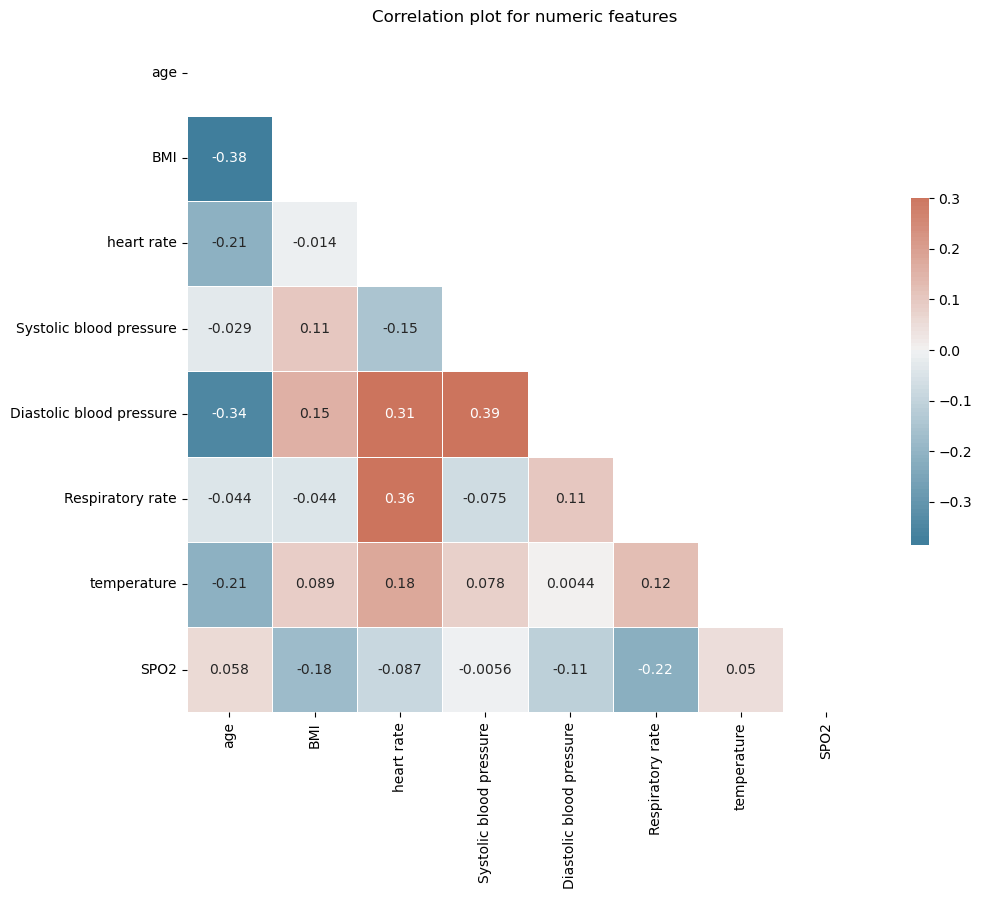

In [10]:

import seaborn as sns
import matplotlib.pyplot as plt


corr_matrix = df[numeric].corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))


f, ax = plt.subplots(figsize=(11, 9))


cmap = sns.diverging_palette(230, 20, n=100)

sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5} , annot=True)
plt.title("Correlation plot for numeric features ")
plt.show()




As age increases, there is an inverse correlation between:
* BMI
* Temperature
* Heart rate
* Diastolic blood pressure

Additionally, systolic blood pressure and respiratory rate exhibit a very small inverse correlation.



* BMI has a positive correlation with blood pressure, suggesting that higher weight may lead to increased pressure on the heart.
* Heart rate is positively correlated with:
	+ Respiratory rate
	+ Diastolic blood pressure
but negatively correlated with Systolic blood pressure

* Both diastolic and systolic blood pressure exhibit positive correlations with each other.

# Catgorical distribution

In [11]:
for i, cat in enumerate(category):
    print(pd.DataFrame(df[cat].value_counts(normalize=True).reset_index(), columns=[cat, 'proportion']))


   outcome  proportion
0      0.0    0.864796
1      1.0    0.135204
   gender  proportion
0       2    0.525064
1       1    0.474936
   hypertensive  proportion
0             1    0.717927
1             0    0.282073
   atrialfibrillation  proportion
0                   0    0.548853
1                   1    0.451147
   CHD with no MI  proportion
0               0    0.914189
1               1    0.085811
   diabetes  proportion
0         0     0.57859
1         1     0.42141
   deficiencyanemias  proportion
0                  0    0.661003
1                  1    0.338997
   depression  proportion
0           0    0.881054
1           1    0.118946
   Hyperlipemia  proportion
0             0    0.620221
1             1    0.379779
   Renal failure  proportion
0              0    0.634664
1              1    0.365336
   COPD  proportion
0     0    0.924384
1     1    0.075616




**Survival Rate:** Of those who underwent treatment, 86% survived, while 14% did not.

**Gender Distribution:** The patient population had a roughly even split between females (47%) and males (52%).

**Medical Conditions:**

* **Hypertension:** 71% of patients had hypertension.
* **Atrial Fibrillation:** 45% of patients had atrial fibrillation.
* **Coronary Artery Disease:** 8% of patients had coronary artery disease but had not experienced a heart attack.
* **Diabetes:** 42% of patients had diabetes.
* **Anemia:** 33% of patients had anemia.
* **Depression:** 11% of patients were depressed.
* **Hyperlipemia:** 38% of patients had hyperlipemia.
* **Renal Failure:** 36% of patients had suffered renal failure.
* **COPD:** 8% of patients had suffered COPD.

# Does high Bmi lead to more death  ?

In [12]:
bins = [0, 18.5, 25, 30,500 ]
labels = ['Underweight', 'Healthy', 'Overweight', 'Obesity']

df['BMI_bin'] =pd.cut(df['BMI'], bins=bins, labels=labels, include_lowest=False)

Text(0.5, 1.0, 'Death rate as per BMI level')

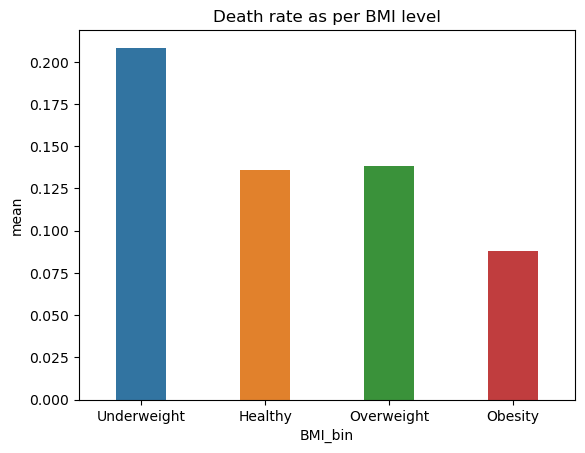

In [13]:
grouped = df.groupby('BMI_bin')['outcome'].agg(['mean', 'count']).reset_index()
sns.barplot(data=grouped, x='BMI_bin', y='mean', width=0.4)
plt.title("Death rate as per BMI level")  

* Is there any significant association between Bmi and mortality

In [14]:
from scipy.stats import chi2_contingency,ttest_ind


Contigency =pd.crosstab(df['BMI_bin']  ,df['outcome'])
display(Contigency)

stat, p_val, dof, expected =chi2_contingency(Contigency)

print(f'p_value {p_val}')
null_hypothesis = "There is no significant association between Bmi and mortality ."  


alternative_hypothesis = "There is a significant association between BMI and mortality , indicating that BMI affects mortality."  

print(f"\nNull Hypothesis: {null_hypothesis}")
print(f"Alternative Hypothesis: {alternative_hypothesis}\n")


if p_val < 0.1:
    print("Reject null hypothesis; Bmi has a significant effect on mortality.")
else:
    print("Fail to reject null hypothesis; there is no significant association between Bmi and mortality.")


outcome,0.0,1.0
BMI_bin,,
Underweight,19,5
Healthy,216,34
Overweight,249,40
Obesity,364,35


p_value 0.06285658916360648

Null Hypothesis: There is no significant association between Bmi and mortality .
Alternative Hypothesis: There is a significant association between BMI and mortality , indicating that BMI affects mortality.

Reject null hypothesis; Bmi has a significant effect on mortality.




**Relationship Between BMI and Mortality**

Our analysis reveals a significant relationship between Body Mass Index (BMI) and mortality rates among patients. Specifically, we found that:

* Patients who are underweight have the highest mortality rate at approximately 20%. Notably, our dataset suggests that these individuals tend to be older, with a median age of around 83 years.
* In contrast, healthy-weight and overweight individuals have relatively similar mortality rates, both around 13%.
* Surprisingly, patients with obesity exhibit lower mortality rates at approximately 8%, with a median age of around 70.

Furthermore, our statistical analysis indicates that BMI has a significant effect on mortality at the 10% significance level. This suggests that there is a meaningful relationship between these two variables, and that BMI may be an important predictor of mortality outcomes.

Overall, our findings highlight the complex interplay between BMI and mortality, and suggest that healthcare providers should consider individual patients' BMI profiles when developing treatment plans or predicting health outcomes.

# Analysis based on Age group

In [15]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-100']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, include_lowest=False)

<Axes: xlabel='age_group', ylabel='mean'>

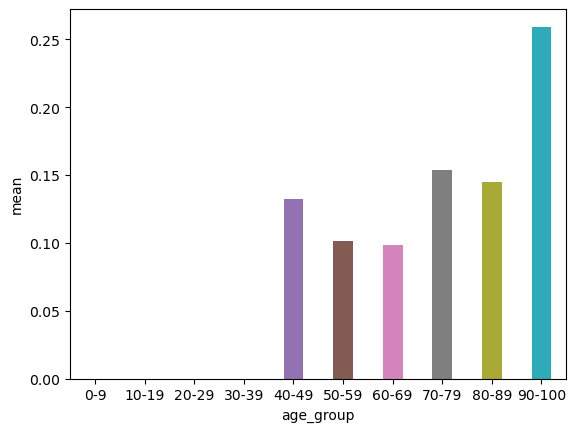

In [16]:
grouped = df.groupby('age_group')['outcome'].agg(['mean', 'count']).reset_index()
grouped=grouped[grouped['count'] >20]
sns.barplot(data=grouped, x='age_group', y='mean', width=0.4)     

* Mortality for age group  70+ is higher than +15 % on average 
* intreasting point is Mortality rate of people between age group 50-70 lower than 40-50 

* Hypothesis : Is  there any  significant association between age groups and mortality 

In [17]:
from scipy.stats import chi2_contingency,ttest_ind



temp = df['age_group'].value_counts()
temp=temp[temp>30]
print("Taking only those age group who have greater than 30 occurance for Statistical significance ")
temp =df[df['age_group'].isin(temp.index)]
Contigency =pd.crosstab(temp['age_group']  ,temp['outcome'])
display(Contigency)

stat, p_val, dof, expected =chi2_contingency(Contigency)

print(f'p_value {p_val}')
null_hypothesis = "There is no significant association between age groups and mortality ."  


alternative_hypothesis = "There is a significant association between age groups and mortality , indicating that age group affects mortality."  

print(f"\nNull Hypothesis: {null_hypothesis}")
print(f"Alternative Hypothesis: {alternative_hypothesis}\n")


if p_val < 0.05:
    print("Reject null hypothesis; age group has a significant effect on mortality.")
else:
    print("Fail to reject null hypothesis; there is no significant association between age group and mortality.")


Taking only those age group who have greater than 30 occurance for Statistical significance 


outcome,0.0,1.0
age_group,,
40-49,46,7
50-59,106,12
60-69,202,22
70-79,248,45
80-89,377,64


p_value 0.2876175100853879

Null Hypothesis: There is no significant association between age groups and mortality .
Alternative Hypothesis: There is a significant association between age groups and mortality , indicating that age group affects mortality.

Fail to reject null hypothesis; there is no significant association between age group and mortality.


In [18]:
df['age_group'].value_counts()

age_group
80-89     442
70-79     293
60-69     224
50-59     118
40-49      53
90-100     27
30-39      16
10-19       2
20-29       2
0-9         0
Name: count, dtype: int64

* Admission for age group 0-40 is very low around 20 such patient  highest is for age group 80-90

# Analysis based on Age 

* Is mean age of survivors and deceased patients is equal

In [19]:

mask=df['outcome']==0
no_death=df[mask]['age']
mask=df['outcome']==1
death =df[mask]['age']
stat, p_val= ttest_ind(no_death ,death)

print(f'p_value {p_val}')
null_hypothesis = " the mean age of survivors and deceased patients is equal"  


alternative_hypothesis = "the mean age of survivors and deceased patients is  different"  

print(f"\nNull Hypothesis: {null_hypothesis}")
print(f"Alternative Hypothesis: {alternative_hypothesis}\n")


if p_val < 0.05:
    print("Reject null hypothesis; the mean age of survivors and deceased patients is  different")
else:
    print("Fail to reject null hypothesis; the mean age of survivors and deceased patients is equal")


p_value 0.026953132715245444

Null Hypothesis:  the mean age of survivors and deceased patients is equal
Alternative Hypothesis: the mean age of survivors and deceased patients is  different

Reject null hypothesis; the mean age of survivors and deceased patients is  different


# Analysis based on gender 

* Hypothesis : Is  there any  significant association between gender and mortality 

In [20]:



temp =df
Contigency =pd.crosstab(temp['gender']  ,temp['outcome'])
display(Contigency)

stat, p_val, dof, expected =chi2_contingency(Contigency)

print(f'p_value {p_val}')
null_hypothesis = "There is no significant association between gender and mortality ."  


alternative_hypothesis = "There is a significant association between gender and mortality , indicating that gender affects mortality."  

print(f"\nNull Hypothesis: {null_hypothesis}")
print(f"Alternative Hypothesis: {alternative_hypothesis}\n")


if p_val < 0.05:
    print("Reject null hypothesis; gender has a significant effect on mortality.")
else:
    print("Fail to reject null hypothesis; there is no significant association between gender and mortality.")


outcome,0.0,1.0
gender,,
1,478,80
2,539,79


p_value 0.48849135488074047

Null Hypothesis: There is no significant association between gender and mortality .
Alternative Hypothesis: There is a significant association between gender and mortality , indicating that gender affects mortality.

Fail to reject null hypothesis; there is no significant association between gender and mortality.


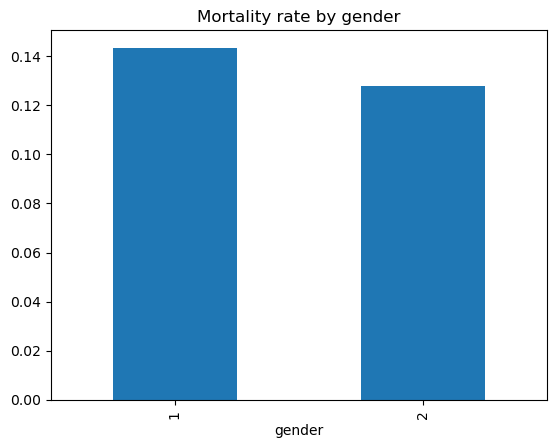

In [42]:
df.groupby(['gender'])['outcome'].mean().plot(kind ='bar')
plt.title("Mortality rate by gender")
plt.show()

* Female has 14% of mortality rate and male has 12% it looks more number of female is dieing but statstical test say a different story 

In [21]:
df.head(2)

,ID,outcome,age,gender,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,...,Renal failure,COPD,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SPO2,BMI_bin,age_group
0,125047,0.0,72,1,37.588179,0,0,0,1,1,...,1,0,68.837838,155.866667,68.333333,16.621622,36.714286,98.394737,Obesity,70-79
1,139812,0.0,75,2,NaN,0,0,0,0,1,...,0,1,101.370370,140.000000,65.000000,20.851852,36.682540,96.923077,NaN,70-79


# Mortality rate by diseases 

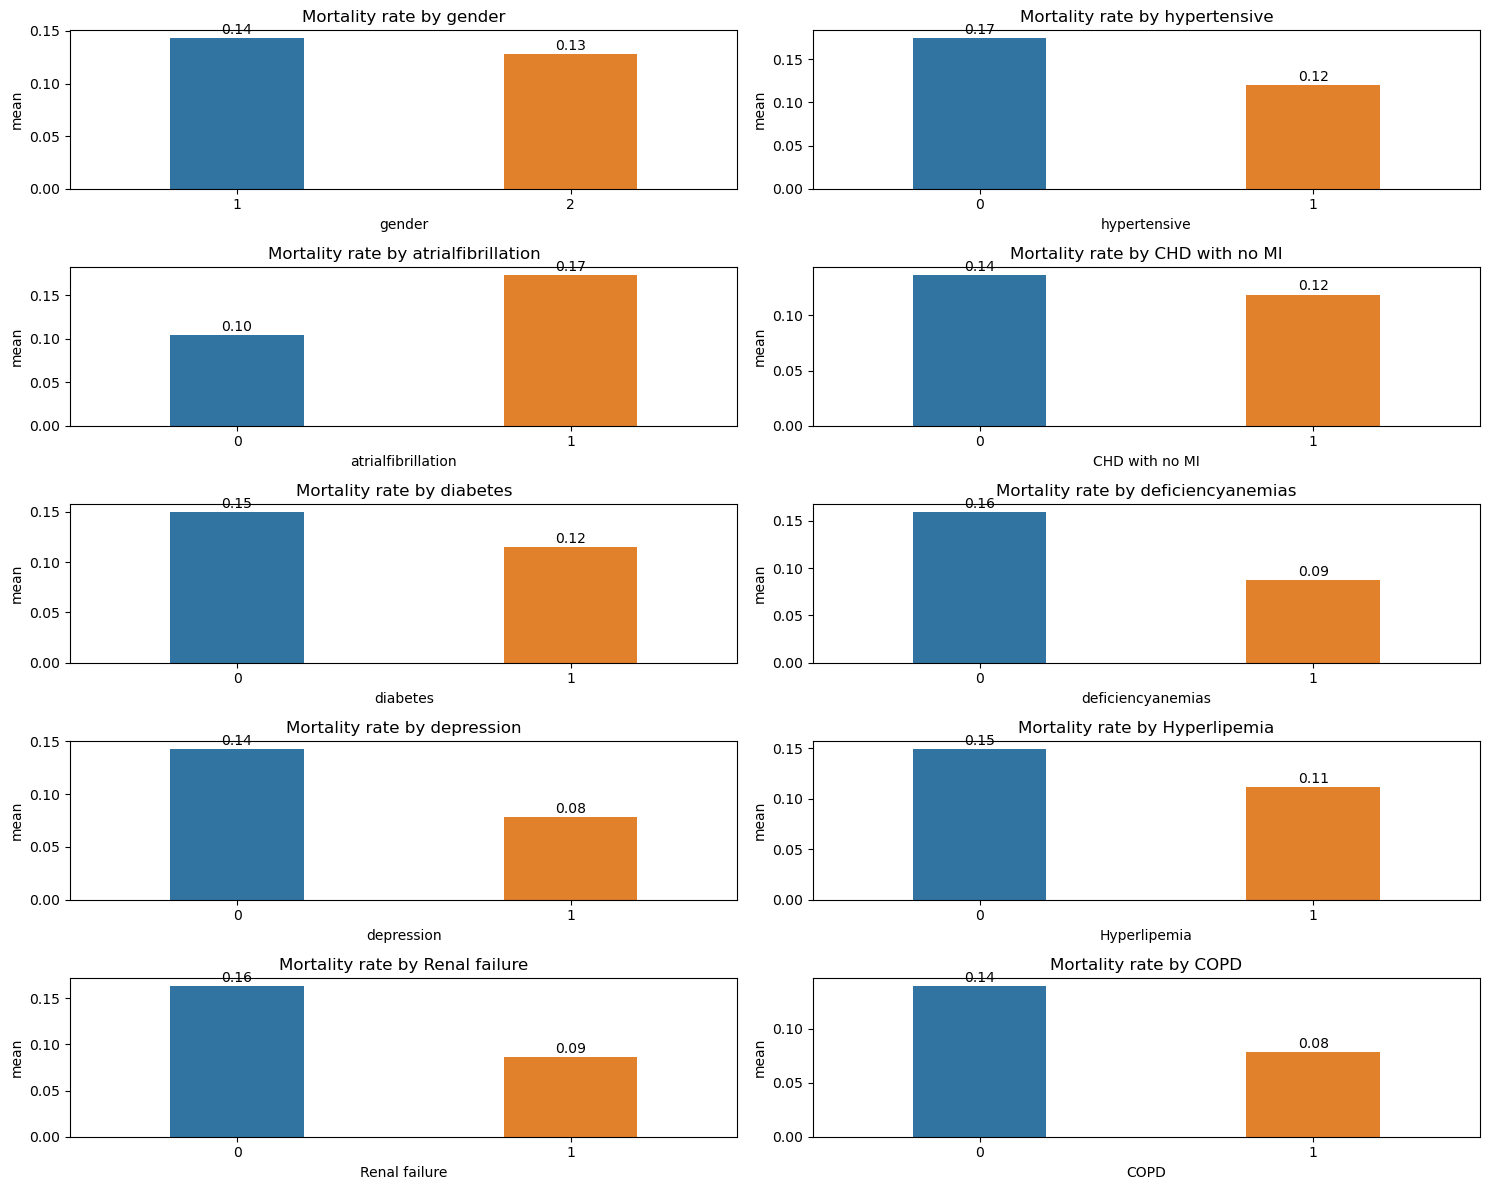

In [22]:
fig, axs = plt.subplots(5,2, figsize=(15, 12))
for idx, cat in enumerate(category[1:]):
    grouped = df.groupby(cat)['outcome'].agg(['mean', 'count']).reset_index()
    i, j = idx//2, idx%2
    sns.barplot(data=grouped, x=cat, y='mean', width=0.4, ax=axs[i][j])     
    
    axs[i][j].set_title(f"Mortality rate by {cat}")
    
    for p in axs[i][j].patches:
        axs[i][j].annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width()/2., p.get_height()),
                            xytext=(0, 3), textcoords="offset points", ha="center")
plt.tight_layout()
plt.show()


* Mortality rate of male and female is around same around 13 - 14 % 

* Mortality rate patient without hypertension is higher compared to the one with hypertension  17% to 12% 
*   Mortality rate of patient with atrialfibrillation is higher then the one who dont have it, its 17% for patient with atrialfibrillation and 10% for patient without atrialfibrillation
 
* mortality rate of patient with  deficiencyanemias lower than the one who dont have it, its 16% for patient with deficiencyanemias and 9% for patient without deficiencyanemias

* mortality rate of patient with  Renal failure lower than the one who dont have it, its 16% for patient with Renal failure and 9% for patient without Renal failure

* mortality rate of patient with  diabetes lower than the one who dont have it, its 15% for patient with diabetes and 12% for patient without diabetes

# Analysis based on SPO2

In [23]:
t=[0,70 ,80 ,90,95,98,100]
bins =['danger to life',
 'severe hypoxia',
 'critical',
 'decreased',
 'insufficient',
 'normal']
df['spo2_bins']=pd.cut(df['SPO2'] ,t, labels=bins)

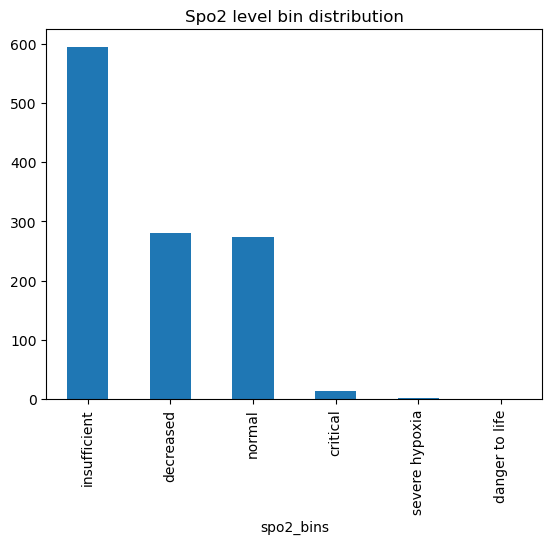

In [24]:
df['spo2_bins'].value_counts().plot(kind='bar')
plt.title("Spo2 level bin distribution")
plt.show()

* 51 % of the patient suffer from insufficient  oxygen level spo2 [95-98]
* 23% of the patient  have  normal oxygen level spo2 [98-100]
* 12% of patient have critical oxygen level spo2 [80-90]

In [25]:
df.groupby('spo2_bins')['outcome'].mean()

spo2_bins
danger to life         NaN
severe hypoxia    1.000000
critical          0.285714
decreased         0.149466
insufficient      0.129630
normal            0.124088
Name: outcome, dtype: float64



1. **Severe Hypoxia is Associated with High Mortality Rate**

The mortality rate is 100% when SpO2 levels are severely low (<80%). This is expected, as severe hypoxia can lead to irreversible tissue damage and death.

2. **Critical SpO2 Levels Have a Significant Impact on Mortality**

At critical SpO2 levels (80-90%), the mortality rate jumps to approximately 28%. This suggests that even small decreases in oxygen saturation can have a substantial effect on survival chances.

3. **Decreased SpO2 Levels Still Pose a Significant Risk**

The mortality rate remains relatively high (14.9%) even at decreased SpO2 levels (90-95%). This emphasizes the importance of monitoring and managing oxygenation in these situations.

4. **Insufficient SpO2 Levels Have a Moderate Impact on Mortality**

At insufficient SpO2 levels (95-98%), the mortality rate is approximately 12.9%. While this is lower than at more severe levels, it still indicates a notable risk.

5. **Normal SpO2 Levels are Associated with Low Mortality**

As expected, normal SpO2 levels (>98%) are linked to a very low mortality rate (0.124%).


In [26]:
mask =df['SPO2']>90
df.loc[mask , 'spo2<90']=0
mask =df['SPO2']<=90
df.loc[mask , 'spo2<90']=1

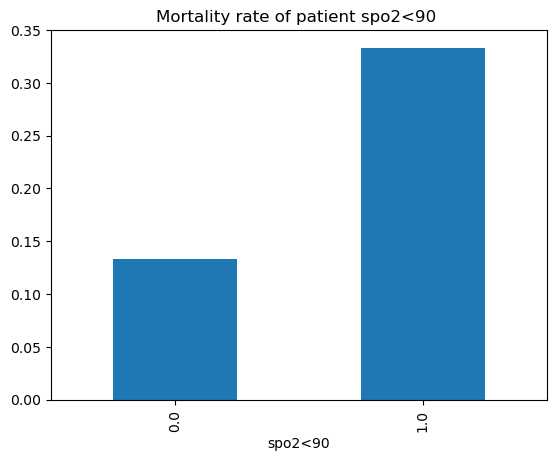

In [27]:
df.groupby('spo2<90')['outcome'].mean().plot(kind='bar')
plt.title("Mortality rate of patient spo2<90 ")
plt.show()


* when spo2 < 90 there is highere mortality rate about 33% compared to 13% when spo2>90

# distribution of diseases  if spo2 gt or ls 90

<Figure size 1000x600 with 0 Axes>

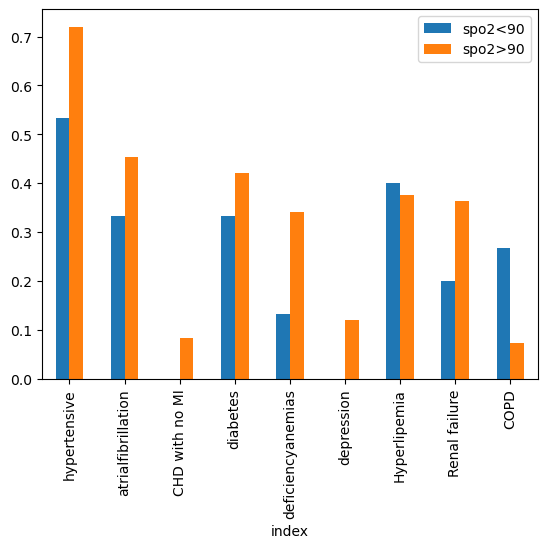

In [28]:
temp1 =df[df['spo2<90']==1]
x=temp1[[
 'hypertensive',
 'atrialfibrillation',
 'CHD with no MI',
 'diabetes',
 'deficiencyanemias',
 'depression',
 'Hyperlipemia',
 'Renal failure',
 'COPD']].mean().reset_index()

temp2 =df[df['spo2<90']==0]
y=temp2[[
 'hypertensive',
 'atrialfibrillation',
 'CHD with no MI',
 'diabetes',
 'deficiencyanemias',
 'depression',
 'Hyperlipemia',
 'Renal failure',
 'COPD']].mean().reset_index()


merged_df = pd.merge(x, y, on='index')
merged_df = merged_df.rename(columns={'0_x': 'spo2<90', '0_y': 'spo2>90'})
merged_df.set_index('index', inplace=True)


# create a bar plot with text labels
plt.figure(figsize=(10,6))
merged_df.plot(kind='bar')


plt.show()


* Patient with spo2<90 26% have copd which inplies Copd  effects oxygen absobtions
* Patient with spo2<90 40% have Hyperlipemia , high fat in liver 



In [29]:
df.groupby('spo2<90')[numeric].median().T

spo2<90,0.0,1.0
age,77.000000,70.000000
BMI,28.296143,33.373645
heart rate,83.280000,87.960000
Systolic blood pressure,116.250000,111.095238
Diastolic blood pressure,58.458042,65.535714
Respiratory rate,20.347826,21.969697
temperature,36.655556,36.444445
SPO2,96.500000,89.083333


* median BMI of people with spo2<90  is higher about 33.37 compared to 28.29 with spo2 >90 
* median heart rate of people with spo2<90  is higher about 87.96 compared to 83.28 with spo2 >90 


# Relationship between various condition as diseases 

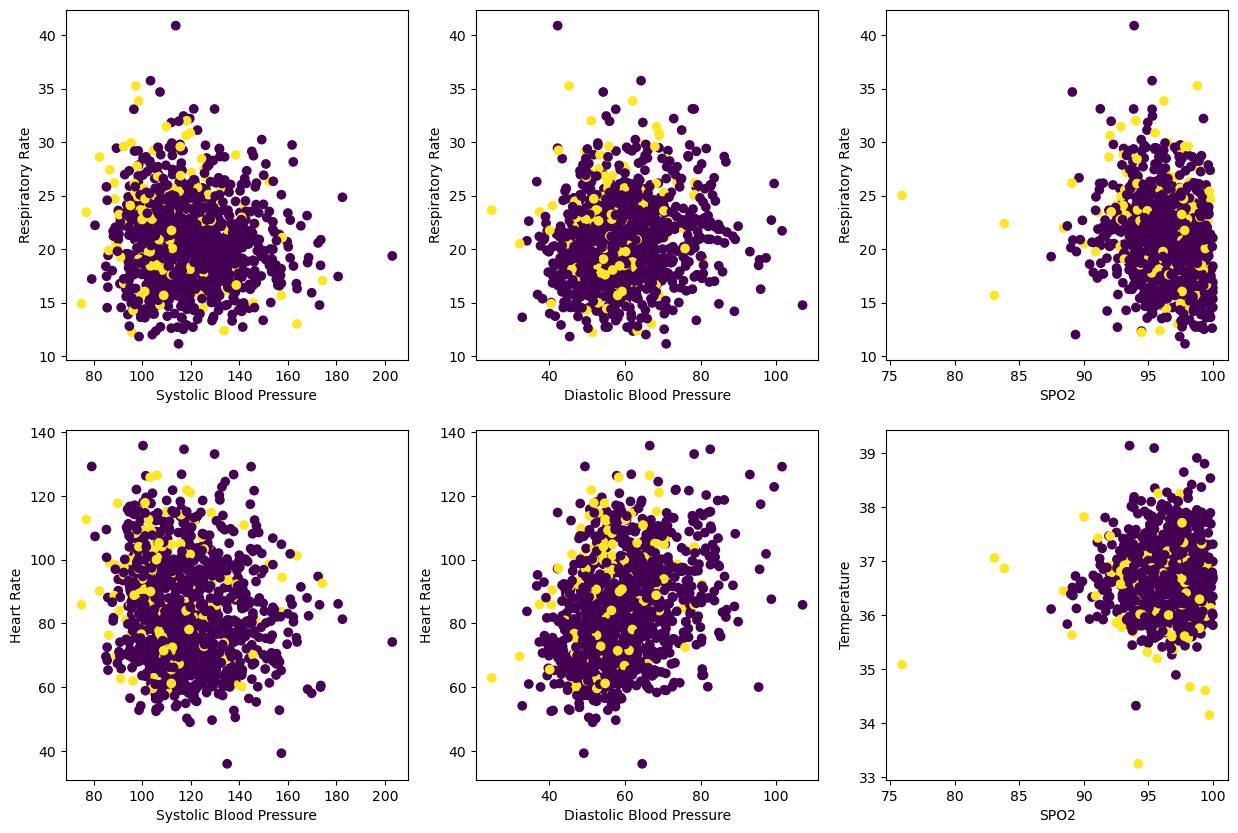

In [30]:


fig, ax = plt.subplots(2, 3, figsize=(15, 10))


gs = fig.add_gridspec(2, 3)


ax[0, 0].scatter(df['Systolic blood pressure'], df['Respiratory rate'], c=df['outcome'])
ax[0, 0].set_xlabel('Systolic Blood Pressure')
ax[0, 0].set_ylabel('Respiratory Rate')

ax[0, 1].scatter(df['Diastolic blood pressure'], df['Respiratory rate'], c=df['outcome'])
ax[0, 1].set_xlabel('Diastolic Blood Pressure')
ax[0, 1].set_ylabel('Respiratory Rate')

ax[0, 2].scatter(df['SPO2'], df['Respiratory rate'], c=df['outcome'])
ax[0, 2].set_xlabel('SPO2')
ax[0, 2].set_ylabel('Respiratory Rate')

ax[1, 0].scatter(df['Systolic blood pressure'], df['heart rate'], c=df['outcome'])
ax[1, 0].set_xlabel('Systolic Blood Pressure')
ax[1, 0].set_ylabel('Heart Rate')

ax[1, 1].scatter(df['Diastolic blood pressure'], df['heart rate'], c=df['outcome'])
ax[1, 1].set_xlabel('Diastolic Blood Pressure')
ax[1, 1].set_ylabel('Heart Rate')

ax[1, 2].scatter(df['SPO2'], df['temperature'], c=df['outcome'])
ax[1, 2].set_xlabel('SPO2')
ax[1, 2].set_ylabel('Temperature')



plt.show()


* There is no clear conclusion that can be derived from plot expect few instances 
* if spo2 < 85 and temperature is less than 37 patient have high mortality 
* if spo2 < 85 and Respiratory Rate is less than 25 patient have high mortality 
* Diastolic blood pressure < 40 and heart rate < 60 patient dies 
* Systolic blood pressure < 40 and Respiratory Rate < 25 patient dies 

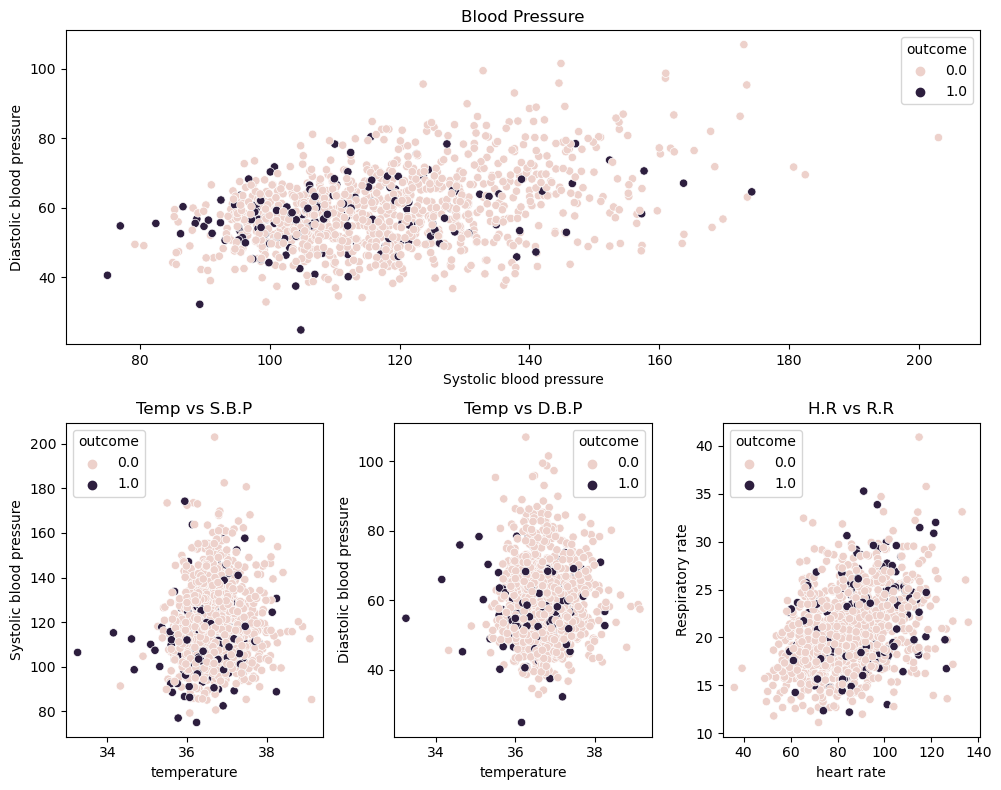

In [31]:


plt.figure(figsize=(10,8))
gs = plt.GridSpec(2,3)

ax1 = plt.subplot(gs[0, :])
sns.scatterplot(data=df, x='Systolic blood pressure', y='Diastolic blood pressure', hue='outcome')
ax1.set_title('Blood Pressure')

ax2 = plt.subplot(gs[1, 0])
sns.scatterplot(data=df, x='temperature', y='Systolic blood pressure', hue='outcome')
ax2.set_title('Temp vs S.B.P')

ax3 = plt.subplot(gs[1, 1])
sns.scatterplot(data=df, x='temperature', y='Diastolic blood pressure', hue='outcome')
ax3.set_title('Temp vs D.B.P')

ax4 = plt.subplot(gs[1, 2])
sns.scatterplot(data=df, x='heart rate', y='Respiratory rate', hue='outcome')
ax4.set_title('H.R vs R.R')

plt.tight_layout()
plt.show()


* Systolic blood pressure < 80 and Diastolic blood pressure < 60 patient dies 
* Systolic blood pressure < 120 and tempearture  < 34 patient dies 

# Analysis based on disease co-occurance

 # Does COPD - Chronic Obstructive Pulmonary Disease effect mortality 

In [32]:

pd.crosstab(df['COPD']  , df['spo2_bins'] ,values=df['outcome'] , aggfunc='mean').fillna(0)


spo2_bins,severe hypoxia,critical,decreased,insufficient,normal
COPD,,,,,
0,1.0,0.4,0.154762,0.134791,0.125475
1,0.0,0.0,0.103448,0.066667,0.090909


* When spo2 was critical and patient did not any COPD 40% from the patient died
* When spo2 was decreased and patient had COPD 10% from the patient died
* cant say concretly if copd nad spo2 had effect on patient mortality ,only 7% of patient had COPD

In [33]:
df.groupby(['diabetes' ,'Renal failure' ])['outcome'].mean().reset_index()


,diabetes,Renal failure,outcome
0,0,0,0.175258
1,0,1,0.086735
2,1,0,0.141221
3,1,1,0.085837


* Patient with no diabetes and no renal failure: 0.175258  mortality percentage
* Patient with no diabetes but renal failure: 0.086735 mortality percentage
* Patient with diabetes and no renal failure: 0.141221 mortality percentage
* Patient with diabetes and renal failure: 0.085837 mortality percentage

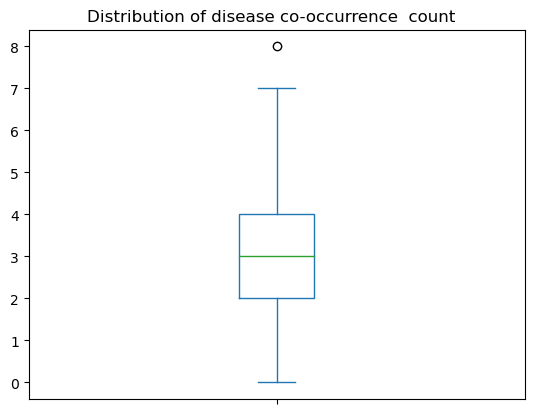

In [34]:
df[['hypertensive',
 'atrialfibrillation',
 'CHD with no MI',
 'diabetes',
 'deficiencyanemias',
 'depression',
 'Hyperlipemia',
 'Renal failure',
 'COPD']].sum(axis =1).plot(kind='box')
plt.title("Distribution of disease co-occurrence  count  ")
plt.show()

* Median co-occurance count is around 3 
* There are people who have more than 7 diseases 

In [35]:
df['disease_co_occ']= df[['hypertensive',
 'atrialfibrillation',
 'CHD with no MI',
 'diabetes',
 'deficiencyanemias',
 'depression',
 'Hyperlipemia',
 'Renal failure',
 'COPD']].sum(axis =1)

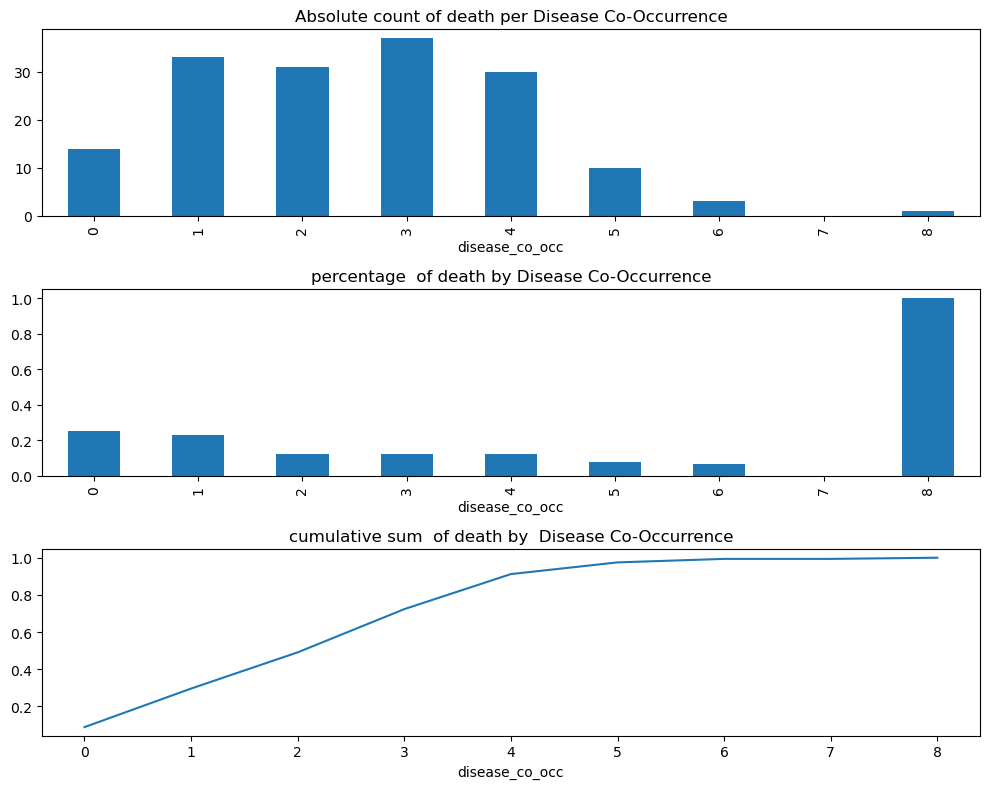

In [36]:

fig, axs = plt.subplots(3, 1, figsize=(10,8))

x=(df.groupby(['disease_co_occ'])['outcome'].mean() * df.groupby(['disease_co_occ'])['outcome'].count())
x.plot(kind ='bar' , ax= axs[0])
axs[0].set_title('Absolute count of death per Disease Co-Occurrence')


df.groupby(['disease_co_occ'])['outcome'].mean().plot(kind ='bar' , ax= axs[1])
axs[1].set_title('percentage  of death by Disease Co-Occurrence')

(x.cumsum()/x.sum()).plot(ax= axs[2])
axs[2].set_title('cumulative sum  of death by  Disease Co-Occurrence')

plt.tight_layout() 
plt.show()


Based on the information you provided, here are some statistics and insights:

1. **Most patients with 3 disease co-occurrences died**: This suggests that having three diseases simultaneously is associated with a higher mortality rate.
2. **Rare but severe: 8 disease co-occurrences had 100% mortality**: Although only one patient had this combination, it's alarming to note that all of them passed away. This highlights the importance of understanding rare and complex disease combinations.
3. **Single disease mortality rate: 25%**: When patients had only one disease, 25% of them died. This suggests that having a single disease can still have significant consequences.
4. **Average mortality rate for 1-4 diseases: 32%**: The average mortality rate for patients with 1 to 4 disease co-occurrences is around 32%. This implies that the number of co-occurring diseases has a significant impact on mortality rates.
5. **91% of deaths occurred in patients with 4 or fewer diseases**: Most people who died (91%) had four or fewer disease co-occurrences. This reinforces the idea that having a smaller number of diseases is associated with higher mortality rates.

These statistics suggest that:

* The number of disease co-occurrences has a significant impact on mortality rates.
* Having three or more diseases simultaneously is particularly detrimental to health outcomes.
* Rare and complex disease combinations, like 8 disease co-occurrences, can have devastating consequences.
* Even having a single disease can be associated with a notable mortality rate.

These findings highlight the importance of understanding the relationships between multiple diseases and their impact on patient outcomes.

# Which combination of diseases has most and least death rate 

In [37]:
import itertools
diseases=['hypertensive',
 'atrialfibrillation',
 'CHD with no MI',
 'diabetes',
 'deficiencyanemias',
 'depression',
 'Hyperlipemia',
 'Renal failure',
 'COPD']
ls =[]
keys =[]
for l in range (   1 , 4):
    permutation = list(itertools.combinations(diseases, l))
    for x in permutation:
        temp_no =df.groupby(list(x))['outcome'].mean().reset_index()
        temp=temp_no[list(x)]
        ls.append(temp_no[temp.all(1)]['outcome'].values[0])
        keys.append(x)

print("Top five disease combination with most death")
for max_idx in np.argsort(ls)[-5:][::-1]:
    temp =df[list(keys[max_idx])]
    cnt =temp[temp.all(1)].shape[0]
    p= round((cnt /df.shape[0])*100,3)
    print(f"For disease combination : {keys[max_idx]} death rate is : {round(ls[max_idx]*100,1)}%  Absolute count of such patient are :{cnt} and percentage count is  : {p}% ")


Top five disease combination with most death
For disease combination : ('atrialfibrillation', 'diabetes', 'COPD') death rate is : 37.5%  Absolute count of such patient are :8 and percentage count is  : 0.68% 
For disease combination : ('atrialfibrillation', 'CHD with no MI', 'COPD') death rate is : 33.3%  Absolute count of such patient are :3 and percentage count is  : 0.255% 
For disease combination : ('atrialfibrillation', 'deficiencyanemias', 'COPD') death rate is : 33.3%  Absolute count of such patient are :6 and percentage count is  : 0.51% 
For disease combination : ('atrialfibrillation', 'CHD with no MI', 'Hyperlipemia') death rate is : 33.3%  Absolute count of such patient are :18 and percentage count is  : 1.529% 
For disease combination : ('CHD with no MI', 'diabetes', 'COPD') death rate is : 33.3%  Absolute count of such patient are :3 and percentage count is  : 0.255% 


In [38]:
from collections import Counter
C = Counter()
for max_idx in np.argsort(ls)[-5:][::-1]: 
    C.update(keys[max_idx])
[k[0] for k  in C.most_common(5)]

['atrialfibrillation',
 'COPD',
 'CHD with no MI',
 'diabetes',
 'deficiencyanemias']

if patient have any of these condition 'atrialfibrillation',
 'COPD',
 'CHD with no MI',
 'diabetes',
 'deficiencyanemias' he has higher probality of death

# insight 

* The patient population under analysis comprises individuals from age 19 to 99, with a mean age of 74. Notably, 50% of patients are below 77 years old.hospitals Should be equipped to handle elderly patient .


 * Patients who are underweight have the highest mortality rate at approximately 20%. Notably, our dataset suggests that these individuals tend to be older, with a median age of around 83 years. underweight and elder patient have higher mortality rate.

* Furthermore, our statistical analysis indicates that BMI has a significant effect on mortality at the 10% significance level. This suggests that there is a meaningful relationship between these two variables, and that BMI may be an important predictor of mortality outcomes.

* Admission for age group 0-40 is very low around 20 such patient  highest is for age group 80-90

* There is no significant association between gender and mortality

* Mortality rate of patient with atrialfibrillation is higher then the one who dont have it, its 17% for patient with atrialfibrillation and 10% for patient without atrialfibrillation

* Severe Hypoxia is Associated with High Mortality Rate

* The mortality rate is 100% when SpO2 levels are severely low (<80%). This is expected, as severe hypoxia can lead to irreversible tissue damage and death.

* Median co-occurance count of disease  is around 3 

* For disease combination : ('atrialfibrillation', 'diabetes', 'COPD') death rate is : 37.5%  Absolute count of such patient are :8 and percentage count is  : 0.68%

* if patient have any of these condition 'atrialfibrillation',
 'COPD',
 'CHD with no MI',
 'diabetes',
 'deficiencyanemias' he has higher probality of death